In [1]:
import pandas as pd
import numpy as np
import os,sys
import ROOT as rt

Welcome to JupyROOT 6.26/02


In [49]:
save_ = True

In [3]:
data = pd.read_csv('Fig6_Bkgs.txt', delimiter='\t',header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,X_Sb70V,Y_Sb70V,ErrorX_Sb70V,ErrorY_Sb70V,X_Sb70Vmodel,Y_Sb70VCompton,Y_Sb70VEC,Y_Sb70VBkgmodel,X_Y70V,Y_Y70V,...,Y_Y70VEC,Y_Y70VBkgmodel,X_Y25V,Y_Y25V,ErrorX_Y25V,ErrorY_Y25V,X_Y25VModel,Y_Y25VCompton,Y_Y25VEC,Y_Y25VBkgmodel
1,2.56287,382.683,0.152868,35.3791,2.56287,264.597,0.000558663,313.854,4.14479,372.056,...,3.76245,390.433,2.96266,704.117,0.762657,21.4854,2.96266,759.048,0,709.99
2,2.8686,258.393,0.152868,29.0715,2.60149,264.608,0.00094044,312.56,6.89437,373.147,...,3.37169,390.013,4.48797,735.586,0.762657,21.9602,2.9892,759.048,0,710.301
3,3.17434,248.581,0.152868,28.5142,2.6401,264.623,0.00155901,311.047,9.64396,386.968,...,2.97384,389.587,6.01329,757.221,0.762657,22.2808,3.01574,759.048,0,710.619
4,3.48008,248.581,0.152868,28.5142,2.67872,264.643,0.00254512,309.342,12.3935,416.79,...,2.58155,389.161,7.5386,807.702,0.762657,23.0116,3.04229,759.048,0,710.945


In [4]:
data.columns = [i for i in data.iloc[0]]
title = [i for i in data.iloc[0]]
data = data.drop([0])
data.head()

,X_Sb70V,Y_Sb70V,ErrorX_Sb70V,ErrorY_Sb70V,X_Sb70Vmodel,Y_Sb70VCompton,Y_Sb70VEC,Y_Sb70VBkgmodel,X_Y70V,Y_Y70V,...,Y_Y70VEC,Y_Y70VBkgmodel,X_Y25V,Y_Y25V,ErrorX_Y25V,ErrorY_Y25V,X_Y25VModel,Y_Y25VCompton,Y_Y25VEC,Y_Y25VBkgmodel
1,2.56287,382.683,0.152868,35.3791,2.56287,264.597,0.000558663,313.854,4.14479,372.056,...,3.76245,390.433,2.96266,704.117,0.762657,21.4854,2.96266,759.048,0,709.99
2,2.8686,258.393,0.152868,29.0715,2.60149,264.608,0.00094044,312.56,6.89437,373.147,...,3.37169,390.013,4.48797,735.586,0.762657,21.9602,2.9892,759.048,0,710.301
3,3.17434,248.581,0.152868,28.5142,2.6401,264.623,0.00155901,311.047,9.64396,386.968,...,2.97384,389.587,6.01329,757.221,0.762657,22.2808,3.01574,759.048,0,710.619
4,3.48008,248.581,0.152868,28.5142,2.67872,264.643,0.00254512,309.342,12.3935,416.79,...,2.58155,389.161,7.5386,807.702,0.762657,23.0116,3.04229,759.048,0,710.945
5,3.78581,278.018,0.152868,30.1553,2.71734,264.666,0.00409169,307.477,15.1431,407.334,...,2.20564,388.738,9.06391,818.192,0.762657,23.1605,3.06883,759.048,0,711.278


In [18]:
title[0:8]

['X_Sb70V',
 'Y_Sb70V',
 'ErrorX_Sb70V',
 'ErrorY_Sb70V',
 'X_Sb70Vmodel',
 'Y_Sb70VCompton',
 'Y_Sb70VEC',
 'Y_Sb70VBkgmodel']

In [14]:
sources = ['Sb70V','Y70V','Y25V']
cols = {}

for source in sources:
    temp = []
    notFound = True
    for i in title:
        last = i.split('_')[-1]
        if(source in i):
            if(last == source):
                if(notFound):
                    temp.append(last)
                    notFound = False
            else:
                temp.append(last)
    cols[source] = temp

print (sources[0],' : ',cols[sources[0]])
print (sources[1],' : ',cols[sources[1]])
print (sources[2],' : ',cols[sources[2]])

Sb70V  :  ['Sb70V', 'Sb70Vmodel', 'Sb70VCompton', 'Sb70VEC', 'Sb70VBkgmodel']
Y70V  :  ['Y70V', 'Y70VModel', 'Y70VCompton', 'Y70VEC', 'Y70VBkgmodel']
Y25V  :  ['Y25V', 'Y25VModel', 'Y25VCompton', 'Y25VEC', 'Y25VBkgmodel']


In [69]:
graphs = {}
temp_Sb = []
temp_Y70 = []
temp_Y25 = []


for src in sources:
    temp_list = []
    for col in cols[src]:
        if(col == cols[src][1]):
            continue
        if(col == src):
            non_null = data['X_%s'%(col)].notna()
            x = pd.to_numeric(data['X_%s'%(col)][non_null], errors='coerce')
            y = pd.to_numeric(data['Y_%s'%(col)][non_null], errors='coerce')
            ex = pd.to_numeric(data['ErrorX_%s'%(col)][non_null], errors='coerce')
            ey = pd.to_numeric(data['ErrorY_%s'%(col)][non_null], errors='coerce')
        else:
            non_null = data['X_%s'%(cols[src][1])].notna()
            x = pd.to_numeric(data['X_%s'%(cols[src][1])][non_null], errors='coerce')
            y = pd.to_numeric(data['Y_%s'%(col)][non_null], errors='coerce')
            ex = pd.to_numeric(np.zeros(len(x)))
            ey = pd.to_numeric(np.zeros(len(x)))
        
        temp_gr = rt.TGraphErrors()
        temp_gr.SetName(col)

        for j in range(len(x)):
            temp_gr.SetPoint(j,(x.iloc[j]),y.iloc[j])
            if(col == src):
                temp_gr.SetPointError(j,ex.iloc[j],ey.iloc[j])
            else:
                temp_gr.SetPointError(j,ex[j],ey[j])
        temp_list.append(temp_gr)
        del temp_gr
    graphs[src] = temp_list

In [68]:
pd.to_numeric(data['X_Y25VModel'], errors='coerce')
#pd.to_numeric(data['Y_Y70VCompton'][non_null], errors='coerce')
#y = pd.to_numeric(data['Y_%s'%(col)][non_null], errors='coerce')

1          2.96266
2          2.98920
3          3.01574
4          3.04229
5          3.06883
           ...    
9996     268.26100
9997     268.28800
9998     268.31400
9999     268.34100
10000    268.36700
Name: X_Y25VModel, Length: 10000, dtype: float64

In [28]:
[i.GetName() for i in graphs[sources[0]]]

['Sb70V', 'Sb70VCompton', 'Sb70VEC', 'Sb70VBkgmodel']

In [29]:
[i.GetName() for i in graphs[sources[1]]]

['Y70V', 'Y70VCompton', 'Y70VEC', 'Y70VBkgmodel']

In [30]:
[i.GetName() for i in graphs[sources[2]]]

['Y25V', 'Y25VCompton', 'Y25VEC', 'Y25VBkgmodel']

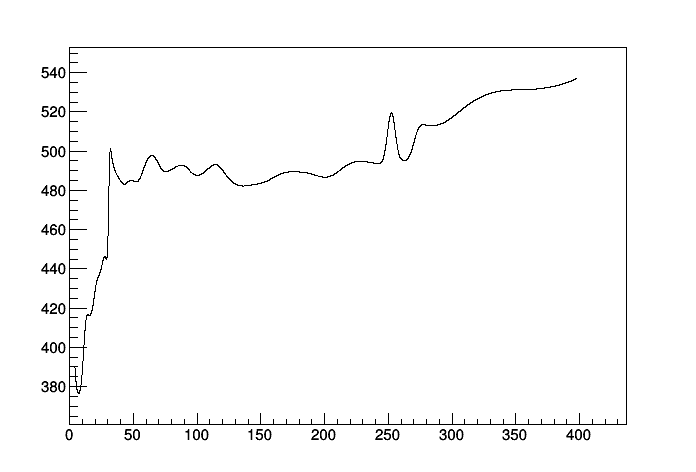

In [70]:
c = rt.TCanvas()
graphs[sources[1]][3].Draw('AL')
c.Draw()

In [44]:
line_color = [rt.kBlack, rt.kBlue, rt.kMagenta, rt.kBlack]
marker_color = [rt.kBlack, rt.kBlue, rt.kRed, rt.kBlack]
xrange = {
    'Sb70V' : [0, 22.2],
    'Y70V' : [0, 250.0],
    'Y25V' : [0, 140.0]
}
yrange = {
    'Sb70V' : [0, 400],
    'Y70V' : [0, 700],
    'Y25V' : [0, 1.25e3]
}
ytitle = {
    'Sb70V' : 'Counts/0.3 keV',
    'Y70V' : 'Counts/2.75 keV',
    'Y25V' : 'Counts/1.5 keV'
}
textlatex = {
    sources[0] : '(a) Antimony (70V)',
    sources[1] : '(b) Yttrium (70V)',
    sources[2] : '(c) Yttrium (25V)'
}

0 : Graph for Y25V
1 : Graph for Y25VCompton
2 : Graph for Y25VEC
3 : Graph for Y25VBkgmodel
Plots saved!!


Info in <TCanvas::Print>: png file ./plots/png/Fig_7(c) Yttrium (25V).png has been created
Info in <TCanvas::Print>: pdf file ./plots/pdf/Fig_7(c) Yttrium (25V).pdf has been created


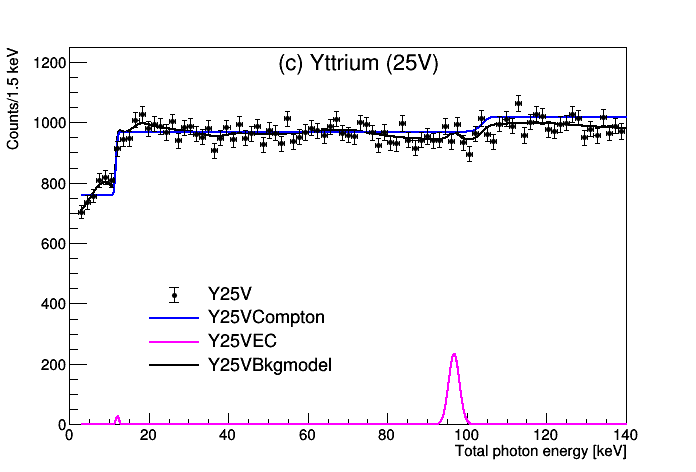

In [79]:
src = sources[2]

c = rt.TCanvas()
count = 0
legend = rt.TLegend(0.2,0.4,0.6,0.2)
#legend.SetNColumns(3)
legend.SetBorderSize(0)

for i,graph in enumerate(graphs[src]):
    print ('%d : Graph for %s'%(i,graph.GetName()))
    if(i == 0):
        graph.SetMarkerColor(marker_color[i])
        graph.SetMarkerStyle(rt.kFullCircle)
        graph.SetMarkerSize(0.6)
    else:
        graph.SetLineColor(line_color[i])
        graph.SetLineWidth(2)
    graph.GetYaxis().SetRangeUser(yrange[src][0],yrange[src][1])
    graph.GetXaxis().SetLimits(xrange[src][0],xrange[src][1])
    
#     if(not count):
#         #graph.Draw("AL3")
        
#         #graph.Draw("AL3")
#         count += 1
#     else:
#         graph.Draw("L3 SAME")
        
    
    
    graph.GetXaxis().SetTitle('Total photon energy [keV]')
    graph.GetYaxis().SetTitle(ytitle[src])
    

    
legend.AddEntry(graphs[src][0],'%s'%(graphs[src][0].GetName()),"pe")
legend.AddEntry(graphs[src][1],'%s'%(graphs[src][1].GetName()),"l")
legend.AddEntry(graphs[src][2],'%s'%(graphs[src][2].GetName()),"l")
legend.AddEntry(graphs[src][3],'%s'%(graphs[src][3].GetName()),"l")

graphs[src][3].Draw('AL3')
graphs[src][2].Draw('L3 SAME')
graphs[src][1].Draw('L3 SAME')
graphs[src][0].Draw('PE SAME')

legend.Draw()
c.Draw()

textOnTop = rt.TLatex()
textOnTop.SetTextSize(0.05);

textOnTop.DrawLatexNDC(0.4,0.85,"#bf{%s}"%(textlatex[src]));

if(save_):
    c.SaveAs('./plots/png/Fig_7%s.png'%(textlatex[src]))
    c.SaveAs('./plots/pdf/Fig_7%s.pdf'%(textlatex[src]))
    print ('Plots saved!!')